# RANDOM FOREST

Data science provides a plethora of classification algorithms such as logistic regression, support vector machine, naive Bayes classifier, and decision trees. But near the top of the classifier hierarchy is the random forest classifier (there is also the random forest regressor but that is a topic for another day).

In this notebook, we will examine how individual decisions trees are combined to make a random forest, and ultimately discover why random forests are good classifiers

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

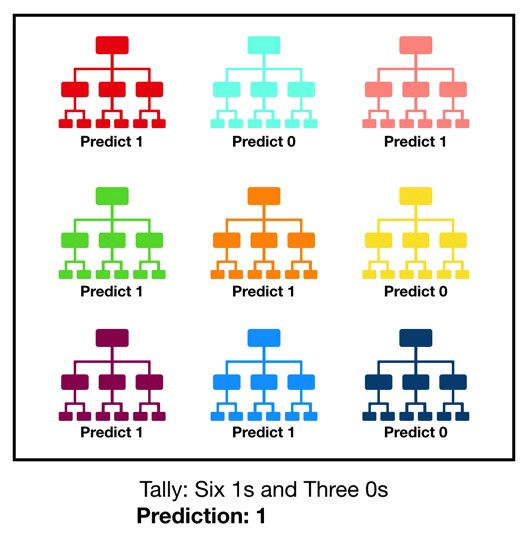

In [1]:
from IPython.display import Image
Image("/Users/rahulgarg/github/AnalyticsCourse/images/1_VHDtVaDPNepRglIAv72BFg.jpeg")

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key.

While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. 

In [4]:
import pandas as pd
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
random_sample1 = train_df.sample(900, replace = True)
random_sample1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_encoded,embarked_encoded
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26,NaN,S,0,2
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,28.0,0,0,343095,8,NaN,S,0,2
128,129,1,3,"Peter, Miss. Anna",female,28.0,1,1,2668,22,F E69,C,0,0
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14,NaN,C,0,0
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27,NaN,C,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8,NaN,S,1,2
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26,NaN,S,1,2
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27,NaN,S,0,2
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8,NaN,S,1,2


In [89]:
random_sample1.PassengerId.value_counts()

123    5
646    5
344    5
89     5
546    4
      ..
512    1
514    1
515    1
517    1
2      1
Name: PassengerId, Length: 573, dtype: int64

In [73]:
random_sample1.shape

(891, 14)

In [76]:
random_sample1.loc[random_sample1.PassengerId == 589]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_encoded,embarked_encoded
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8,NaN,S,1,2
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8,NaN,S,1,2
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8,NaN,S,1,2
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8,NaN,S,1,2
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8,NaN,S,1,2
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8,NaN,S,1,2


In [77]:
random_sample1.PassengerId.nunique()

550

In [78]:
train_df.PassengerId.nunique()

891

## Ensuring that the Models Diversify Each Other
So how does random forest ensure that the behavior of each individual tree is not too correlated with the behavior of any of the other trees in the model? It uses the following two methods:

**1. Bagging (Bootstrap Aggregation)** — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset **with replacement,** resulting in different trees. This process is known as bagging.

Notice that with bagging we are not subsetting the training data into smaller chunks and training each tree on a different chunk. Rather, if we have a sample of size N, we are still feeding each tree a training set of size N (unless specified otherwise). But instead of the original training data, we take a random sample of size N with replacement. For example, if our training data was [1, 2, 3, 4, 5, 6] then we might give one of our trees the following list [1, 2, 2, 3, 6, 6]. Notice that both lists are of length six and that “2” and “6” are both repeated in the randomly selected training data we give to our tree (because we sample with replacement).

**2. Feature Randomness** — In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

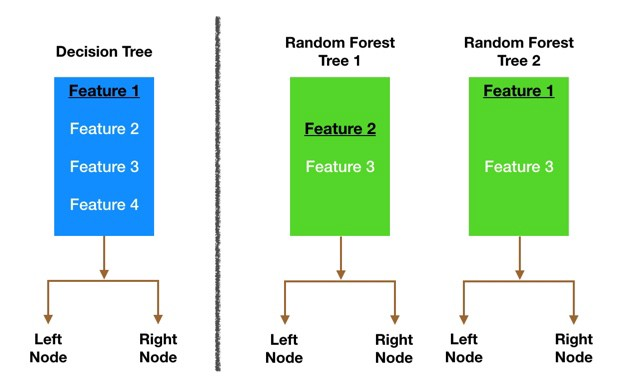

In [5]:
Image("/Users/rahulgarg/github/AnalyticsCourse/images/1_EemYMyOADnT0lJWSXmTDdg.jpeg")

So in our random forest, we end up with trees that are not only trained on different sets of data (thanks to bagging) but also use different features to make decisions.

# Advantages of Random Forest

1. It reduces overfitting in decision trees and helps to improve the accuracy
2. It is flexible to both classification and regression problems
3. It works well with both categorical and continuous values
4. It automates missing values present in the data
5. Normalising of data is not required as it uses a rule-based approach.


# Disadvantages
1. It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
2. It also requires much time for training as it combines a lot of decision trees to determine the class.
3. Due to the ensemble of decision trees, it also suffers interpretability and we have little control on what the model does

In [90]:
import pandas as pd
import numpy as np

# Read Train DataFrames

In [91]:
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv')

In [92]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
test_df.isna().sum()

Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               327
Embarked              0
gender_encoded        0
embarked_encoded      0
dtype: int64

In [94]:
train_df['Fare'].mean()

32.2042079685746

In [95]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
# Impute Missing Values
train_df['Age'] = train_df.Age.fillna(28.0)

train_df['Fare'] = train_df['Fare'].astype(int)

train_df['Embarked'] = train_df.Embarked.fillna('S')

In [97]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S


In [98]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_gender = preprocessing.LabelEncoder() #instantiate
le_gender.fit(train_df.Sex) #Fit

LabelEncoder()

In [99]:
train_df['gender_encoded'] =le_gender.transform(train_df.Sex)

In [100]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_embarked = preprocessing.LabelEncoder() #instantiate
le_embarked.fit(train_df.Embarked) #Fit

LabelEncoder()

In [101]:
train_df['embarked_encoded'] =le_embarked.transform(train_df.Embarked)

In [6]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [140]:
X = pd.DataFrame(train_df.loc[:,['Pclass','Age','Parch','Fare','gender_encoded','embarked_encoded' ]])
y = train_df.Survived # Step 0

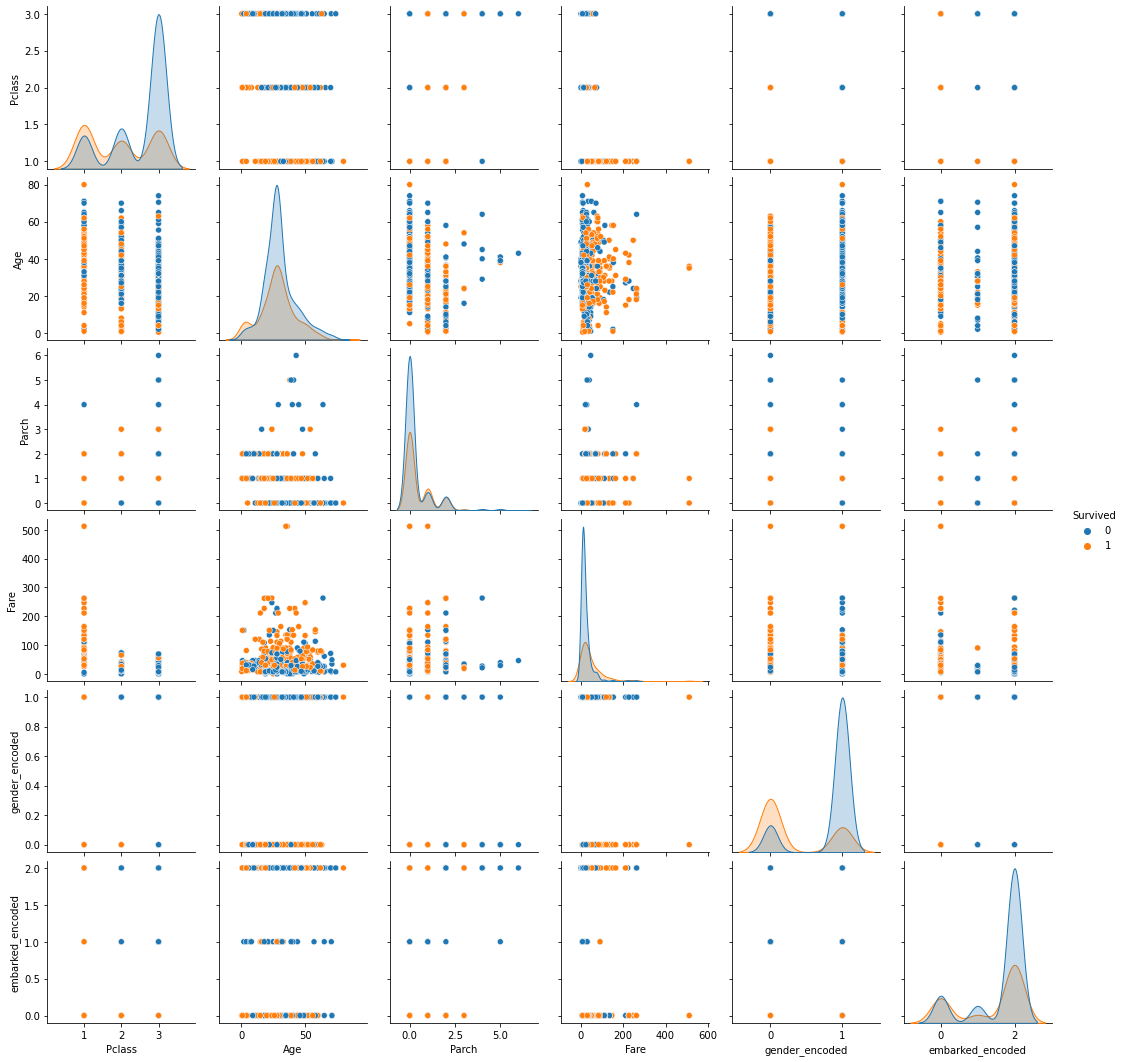

In [204]:
import seaborn as sns
train = train_df.loc[:,['Survived','Pclass','Age','Parch','Fare','gender_encoded','embarked_encoded' ]]
sns.pairplot(train, diag_kind = 'kde', hue = 'Survived' )

In [141]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.20, random_state=20)

In [187]:
from sklearn.ensemble import RandomForestClassifier # Import

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=500,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             max_depth = 5,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) # Instantiate
rf.fit(X, y) # Fit
print("%.4f" % rf.score(X,y))

0.8552


In [188]:
rf.score(X_valid,y_valid)

0.8659217877094972

In [194]:
y_pred = rf.predict(X_valid)

In [195]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_pred)

0.7966101694915254

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
pd.DataFrame(cm,columns =  ['Predicted_0','Predicted_1'], index = ['Survived_0','Survived_1'])

NameError: name 'y_valid' is not defined

In [167]:
precision = 44/(44+8)
precision

0.8461538461538461

In [168]:
recall = 44/(44+23)
recall

0.6567164179104478

In [169]:
F1 = 2 * (precision * recall) / (precision + recall)

In [170]:
F1

0.7394957983193277

# Feature Importance

In [171]:
pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,gender_encoded,0.484852
3,Fare,0.166398
0,Pclass,0.164832
1,Age,0.112165
5,embarked_encoded,0.036093
2,Parch,0.035661


## Predictions on test set

In [172]:
test_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/test.csv', index_col = 0)
test_df['Age'] = test_df.Age.fillna(28.0)
test_df['Fare'] = test_df['Fare'].fillna(31).astype(int)
test_df['Embarked'] = test_df.Embarked.fillna('S')

test_df['gender_encoded'] =le_gender.transform(test_df.Sex)
test_df['embarked_encoded'] =le_embarked.transform(test_df.Embarked)

X_test = pd.DataFrame(test_df.loc[:,['Pclass','Age','Parch','Fare','gender_encoded','embarked_encoded' ]])
X_test.head(2)

,Pclass,Age,Parch,Fare,gender_encoded,embarked_encoded
PassengerId,,,,,,
892,3,34.5,0,7,1,1
893,3,47.0,0,7,0,2


In [173]:
test_preds = rf.predict(X_test) #predict

In [174]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [175]:
submission_df = pd.DataFrame(test_preds, index= test_df.index, columns = ['Survived'])
submission_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [177]:
submission_df.to_csv('/Users/rahulgarg/github/AnalyticsCourse/kaggle_submissions/titanic_submission_rf_v3.csv')